In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [3]:
#read the train and test data
train_data=pd.read_csv('./data/mnist_train.csv')
test_data=pd.read_csv('./data/mnist_test.csv')

In [4]:
#remove the labels from the train and test data
train_data_clust=train_data.drop(columns=['label'])
test_data_clust=test_data.drop(columns=['label'])

In [5]:
#Since the values are between 0 and 255 normalize it between 0 and 1
train_data_clust=train_data_clust/255
test_data_clust=test_data_clust/255

c:\Users\gyane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gyane\AppData\Local\Temp\ipykernel_14312\4068907802.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax[i, j].imshow(train_data_clust[:100][test_data['label'] == i][labels[test_data['label'] == i] == j].reshape(-1, 28, 28)[0], cmap='gray')


IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 10000

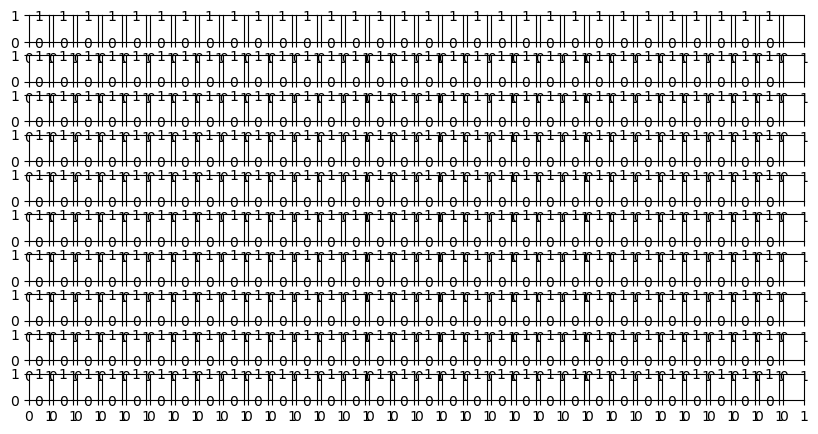

In [8]:

# Define the number of components and clusters
components_list = [32, 64, 128]
clusters_list = [10, 7, 4]

# Function to perform PCA from scratch
def custom_pca(X, n_components):
    # Calculate the mean
    mean = np.mean(X, axis=0)
    
    # Center the data
    X_centered = X - mean
    
    # Calculate the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)
    
    # Perform SVD
    U, S, Vt = np.linalg.svd(cov_matrix)
    
    # Select the top n_components eigenvectors
    top_components = U[:, :n_components]
    
    # Project the data onto the selected eigenvectors
    X_pca = np.dot(X_centered, top_components)
    
    return X_pca

# Loop through different numbers of components and clusters
for n_components in components_list:
    for n_clusters in clusters_list:
        # Perform PCA from scratch
        X_pca = custom_pca(, n_components)
        
        # Perform GMM clustering
        gmm = GaussianMixture(n_components=n_clusters, random_state=0)
        gmm.fit(X_pca)
        
        # Predict cluster labels
        labels = gmm.predict(X_pca)
        
        # Visualization
        fig, ax = plt.subplots(n_clusters, n_components, figsize=(10, 5))
        plt.subplots_adjust(wspace=0.2, hspace=0.5)
        
        for i in range(n_clusters):
            for j in range(n_components):
                ax[i, j].imshow(X[y == i][labels[y == i] == j].reshape(-1, 28, 28)[0], cmap='gray')
                ax[i, j].axis('off')
                ax[i, j].set_title(f'Cluster {i}, Component {j}')
        
        plt.suptitle(f'PCA Components: {n_components}, Clusters: {n_clusters}', fontsize=16)
        plt.show()
